In [3]:
import sys
!{sys.executable} -m pip install scikit-learn

   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.7 MB 3.1 MB/s eta 0:00:03
   -------- ------------------------------- 1.8/8.7 MB 4.5 MB/s eta 0:00:02
   ------------- -------------------------- 2.9/8.7 MB 4.5 MB/s eta 0:00:02
   ------------------ --------------------- 3.9/8.7 MB 4.7 MB/s eta 0:00:02
   --------------------- ------------------ 4.7/8.7 MB 5.0 MB/s eta 0:00:01
   -------------------------- ------------- 5.8/8.7 MB 4.5 MB/s eta 0:00:01
   --------------------------- ------------ 6.0/8.7 MB 4.3 MB/s eta 0:00:01
   -------------------------------- ------- 7.1/8.7 MB 4.0 MB/s eta 0:00:01
   ------------------------------------ --- 7.9/8.7 MB 4.1 MB/s eta 0:00:01
   ---------------------------------------  8.7/8.7 MB 4.0 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 3.9 MB/s  0:00:02
   --------------------------

Could not find platform independent libraries <prefix>


In [1]:
import requests
import pandas as pd

# Fetch data from FPL static API
url = "https://fantasy.premierleague.com/api/bootstrap-static/"
response = requests.get(url)
data = response.json()

# Extract player data
players = data['elements']
players_df = pd.DataFrame(players)

# Display all column names
print("Total columns:", len(players_df.columns))
print("\nPlayer Columns:\n")
for col in players_df.columns:
    print(f"- {col}")


Total columns: 101

Player Columns:

- can_transact
- can_select
- chance_of_playing_next_round
- chance_of_playing_this_round
- code
- cost_change_event
- cost_change_event_fall
- cost_change_start
- cost_change_start_fall
- dreamteam_count
- element_type
- ep_next
- ep_this
- event_points
- first_name
- form
- id
- in_dreamteam
- news
- news_added
- now_cost
- photo
- points_per_game
- removed
- second_name
- selected_by_percent
- special
- squad_number
- status
- team
- team_code
- total_points
- transfers_in
- transfers_in_event
- transfers_out
- transfers_out_event
- value_form
- value_season
- web_name
- region
- team_join_date
- birth_date
- has_temporary_code
- opta_code
- minutes
- goals_scored
- assists
- clean_sheets
- goals_conceded
- own_goals
- penalties_saved
- penalties_missed
- yellow_cards
- red_cards
- saves
- bonus
- bps
- influence
- creativity
- threat
- ict_index
- clearances_blocks_interceptions
- recoveries
- tackles
- defensive_contribution
- starts
- expected

In [ ]:
import requests
import pandas as pd

# Fetch FPL data
url = "https://fantasy.premierleague.com/api/bootstrap-static/"
response = requests.get(url)
data = response.json()

# Base player data
players_df = pd.DataFrame(data['elements'])

# Team and Position Mappings
teams_df = pd.DataFrame(data['teams'])[['id', 'name']].rename(columns={'id': 'team', 'name': 'team_name'})
positions_df = pd.DataFrame(data['element_types'])[['id', 'singular_name_short']].rename(columns={'id': 'element_type', 'singular_name_short': 'position'})

# Merge team names and positions
players_df = players_df.merge(teams_df, on='team', how='left')
players_df = players_df.merge(positions_df, on='element_type', how='left')

# Select final columns
important_columns = [
    "first_name", "second_name", "web_name", "team_name", "position",
    "now_cost", "total_points", "points_per_game", "minutes", "goals_scored",
    "assists", "clean_sheets", "goals_conceded", "yellow_cards", "red_cards",
    "penalties_saved", "penalties_missed", "saves", "bonus", "bps",
    "influence", "creativity", "threat", "ict_index", "selected_by_percent",
    "form", "ep_next", "expected_goals", "expected_assists","expected_goal_involvements",
    "expected_goals_conceded", "status", "penalties_order", "defensive_contribution", "defensive_contribution_per_90", "team_join_date"
]

filtered_df = players_df[important_columns].sort_values(by="total_points", ascending=False)

# Save to Excel
filtered_df.to_excel("fpl_players_24_25.xlsx", index=False)
print("Saved: fpl_players_24_25.xlsx ✅")


Saved: fpl_players_24_25.xlsx ✅


In [ ]:
# import requests
# import pandas as pd

# # Fetch data from FPL API
# fixtures_url = "https://fantasy.premierleague.com/api/fixtures/"
# teams_url = "https://fantasy.premierleague.com/api/bootstrap-static/"

# fixtures_data = requests.get(fixtures_url).json()
# teams_data = requests.get(teams_url).json()['teams']

# # Convert to DataFrames
# fixtures_df = pd.DataFrame(fixtures_data)
# teams_df = pd.DataFrame(teams_data)[['id', 'name']]
# teams_df.columns = ['team_id', 'team_name']

# # Map team names to fixture DataFrame
# fixtures_df = fixtures_df.merge(teams_df, left_on='team_h', right_on='team_id', how='left')
# fixtures_df = fixtures_df.rename(columns={'team_name': 'home_team'}).drop(columns=['team_id'])

# fixtures_df = fixtures_df.merge(teams_df, left_on='team_a', right_on='team_id', how='left')
# fixtures_df = fixtures_df.rename(columns={'team_name': 'away_team'}).drop(columns=['team_id'])

# # Only keep scheduled fixtures
# fixtures_df = fixtures_df[fixtures_df['event'].notnull()]

# # Create blank/double flags per team per gameweek
# fixture_flags = pd.concat([
#     fixtures_df[['event', 'home_team']].rename(columns={'home_team': 'team'}),
#     fixtures_df[['event', 'away_team']].rename(columns={'away_team': 'team'})
# ])

# fixture_counts = fixture_flags.groupby(['event', 'team']).size().reset_index(name='fixture_count')
# fixture_counts['blank_gameweek'] = fixture_counts['fixture_count'] == 0
# fixture_counts['double_gameweek'] = fixture_counts['fixture_count'] > 1
# fixture_counts = fixture_counts.rename(columns={'event': 'gameweek'})

# # Merge flags back into fixture-level data (team-based rows)
# home_flags = fixture_counts.rename(columns={'team': 'home_team'})
# away_flags = fixture_counts.rename(columns={'team': 'away_team'})

# fixtures_df = fixtures_df.merge(home_flags[['gameweek', 'home_team', 'blank_gameweek', 'double_gameweek']],
#                                  left_on=['event', 'home_team'], right_on=['gameweek', 'home_team'],
#                                  how='left').rename(columns={
#                                      'blank_gameweek': 'home_blank_gameweek',
#                                      'double_gameweek': 'home_double_gameweek'
#                                  }).drop(columns=['gameweek'])

# fixtures_df = fixtures_df.merge(away_flags[['gameweek', 'away_team', 'blank_gameweek', 'double_gameweek']],
#                                  left_on=['event', 'away_team'], right_on=['gameweek', 'away_team'],
#                                  how='left').rename(columns={
#                                      'blank_gameweek': 'away_blank_gameweek',
#                                      'double_gameweek': 'away_double_gameweek'
#                                  }).drop(columns=['gameweek'])

# # Final selection
# final_fixtures = fixtures_df[[
#     'event', 'home_team', 'away_team',
#     'team_h_difficulty', 'team_a_difficulty',
#     'home_blank_gameweek', 'home_double_gameweek',
#     'away_blank_gameweek', 'away_double_gameweek'
# ]].rename(columns={
#     'event': 'gameweek',
#     'team_h_difficulty': 'home_team_difficulty',
#     'team_a_difficulty': 'away_team_difficulty'
# })

# # Save to CSV
# final_fixtures.to_csv("fpl_fixtures_named_24_25.csv", index=False)
# print("CSV saved: fpl_fixtures_named_24_25.csv")


CSV saved: fpl_fixtures_named_24_25.csv


In [1]:
import requests
import pandas as pd

# Fetch data from FPL API
fixtures_url = "https://fantasy.premierleague.com/api/fixtures/"
teams_url = "https://fantasy.premierleague.com/api/bootstrap-static/"

fixtures_data = requests.get(fixtures_url).json()
teams_data = requests.get(teams_url).json()['teams']

# Convert to DataFrames
fixtures_df = pd.DataFrame(fixtures_data)
teams_df = pd.DataFrame(teams_data)[['id', 'name']]
teams_df.columns = ['team_id', 'team_name']

# Map team names to fixture DataFrame
fixtures_df = fixtures_df.merge(teams_df, left_on='team_h', right_on='team_id', how='left')
fixtures_df = fixtures_df.rename(columns={'team_name': 'home_team'}).drop(columns=['team_id'])

fixtures_df = fixtures_df.merge(teams_df, left_on='team_a', right_on='team_id', how='left')
fixtures_df = fixtures_df.rename(columns={'team_name': 'away_team'}).drop(columns=['team_id'])

# Only keep scheduled fixtures
fixtures_df = fixtures_df[fixtures_df['event'].notnull()]

# Flag blank and double gameweeks
fixture_flags = pd.concat([
    fixtures_df[['event', 'home_team']].rename(columns={'home_team': 'team'}),
    fixtures_df[['event', 'away_team']].rename(columns={'away_team': 'team'})
])

# Count fixtures per team per gameweek
fixture_counts = fixture_flags.groupby(['event', 'team']).size().reset_index(name='fixture_count')

# Add blank and double flags
fixture_counts['blank_gameweek'] = fixture_counts['fixture_count'] == 0
fixture_counts['double_gameweek'] = fixture_counts['fixture_count'] > 1

# Rename columns for clarity
fixture_counts = fixture_counts.rename(columns={
    'event': 'gameweek',
    'team': 'team_name'
})[['gameweek', 'team_name', 'fixture_count', 'blank_gameweek', 'double_gameweek']]

# Save to CSV
fixture_counts.to_excel("fpl_fixture_flags_24_25.xlsx", index=False)
print("CSV saved: fpl_fixture_flags_24_25.csv")


CSV saved: fpl_fixture_flags_24_25.csv


In [4]:
import requests
import pandas as pd

# Fetch data from FPL API
fixtures_url = "https://fantasy.premierleague.com/api/fixtures/"
teams_url = "https://fantasy.premierleague.com/api/bootstrap-static/"

fixtures_data = requests.get(fixtures_url).json()
teams_data = requests.get(teams_url).json()['teams']

# Convert to DataFrames
fixtures_df = pd.DataFrame(fixtures_data)
teams_df = pd.DataFrame(teams_data)[['id', 'name']]
teams_df.columns = ['team_id', 'team_name']

# Map team names to fixture DataFrame
fixtures_df = fixtures_df.merge(teams_df, left_on='team_h', right_on='team_id', how='left')
fixtures_df = fixtures_df.rename(columns={'team_name': 'home_team'}).drop(columns=['team_id'])

fixtures_df = fixtures_df.merge(teams_df, left_on='team_a', right_on='team_id', how='left')
fixtures_df = fixtures_df.rename(columns={'team_name': 'away_team'}).drop(columns=['team_id'])

# Final columns
final_fixtures = fixtures_df[[
    'event', 'home_team', 'away_team', 'team_h_difficulty', 'team_a_difficulty'
]]
final_fixtures.columns = [
    'gameweek', 'home_team', 'away_team', 'home_team_difficulty', 'away_team_difficulty'
]

# Save to CSV
final_fixtures.to_excel("fpl_fixtures_named_24_25.xlsx", index=False)
print("CSV saved: fpl_fixtures_named_24_25.csv")


CSV saved: fpl_fixtures_named_24_25.csv


In [7]:
import pandas as pd

# Load Excel files
players_df = pd.read_excel("fpl_players_24_25.xlsx")
fixtures_df = pd.read_excel("fpl_fixtures_named_24_25.xlsx")

# Preview available position labels in the dataset
print("Available positions in player data:", players_df["position"].unique())

# Compute average team difficulty for next 5 GWs
difficulty_dict = {}

for team in players_df['team_name'].unique():
    print(team)
    team_fixtures = fixtures_df[
        (fixtures_df['home_team'] == team) | (fixtures_df['away_team'] == team)
    ].copy()

    team_fixtures = team_fixtures.sort_values(by='gameweek').head(5)
    print(team_fixtures)

    total_diff = 0
    for _, row in team_fixtures.iterrows():
        if row['home_team'] == team:
            total_diff += row['home_team_difficulty']
        else:
            total_diff += row['away_team_difficulty']

    avg_difficulty = total_diff / 5 if not team_fixtures.empty else 3
    difficulty_dict[team] = avg_difficulty

# Map and transform difficulty
players_df["avg_team_difficulty"] = players_df["team_name"].map(difficulty_dict)
players_df["difficulty_score"] = (6 - players_df["avg_team_difficulty"])

# Print difficulty scores for verification
print("\n=== Team Difficulty Scores ===")
print(players_df[["team_name", "avg_team_difficulty", "difficulty_score"]].drop_duplicates().sort_values("difficulty_score", ascending=False))


Available positions in player data: ['MID' 'FWD' 'GKP' 'DEF']
Liverpool
    gameweek  home_team    away_team  home_team_difficulty  \
0          1  Liverpool  Bournemouth                     3   
19         2  Newcastle    Liverpool                     4   
29         3  Liverpool      Arsenal                     4   
38         4    Burnley    Liverpool                     4   
40         5  Liverpool      Everton                     2   

    away_team_difficulty  
0                      5  
19                     4  
29                     5  
38                     2  
40                     5  
Man Utd
    gameweek home_team away_team  home_team_difficulty  away_team_difficulty
8          1   Man Utd   Arsenal                     4                     3
18         2    Fulham   Man Utd                     3                     3
22         3   Man Utd   Burnley                     2                     3
39         4  Man City   Man Utd                     3                     4


In [6]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load Excel files
players_df = pd.read_excel("fpl_players_24_25.xlsx")
fixtures_df = pd.read_excel("fpl_fixtures_named_24_25.xlsx")

# Average team difficulty for GW 1–5
first_5_gws = fixtures_df[fixtures_df['gameweek'] <= 5]
home = first_5_gws.groupby("home_team")["home_team_difficulty"].mean()
away = first_5_gws.groupby("away_team")["away_team_difficulty"].mean()
avg_difficulty = pd.concat([home, away], axis=1).mean(axis=1).reset_index()
avg_difficulty.columns = ['team_name', 'avg_team_difficulty']

# Merge difficulty into players data
players_df = players_df.merge(avg_difficulty, left_on="team_name", right_on="team_name", how="left")

# Filter only available players
players_df = players_df[players_df["status"] == "a"]

# Normalize relevant numeric columns
norm_cols = [
    'ep_next', 'points_per_game', 'selected_by_percent', 'ict_index',
    'bps', 'bonus', 'yellow_cards', 'red_cards', 'avg_team_difficulty'
]
scaler = MinMaxScaler()
players_df[[col + "_norm" for col in norm_cols]] = scaler.fit_transform(players_df[norm_cols])

# Define position-based weights (summing to 10)
WEIGHTS = {
    "GKP": {
        'total_points': 1.0,
        'clean_sheets': 1.2,
        'saves': 1.0,
        'penalties_saved': 1.0,
        'ep_next_norm': 1.2,
        'points_per_game_norm': 1.0,
        'selected_by_percent_norm': 0.5,
        'ict_index_norm': 0.3,
        'avg_team_difficulty_norm': 0.5,
        'bps_norm': 0.3,
        'bonus_norm': 0.5,
        'yellow_cards_norm': -0.15,
        'red_cards_norm': -0.15,
    },
    "DEF": {
        'total_points': 1.0,
        'clean_sheets': 1.0,
        'goals_scored': 1.0,
        'assists': 1.0,
        'ep_next_norm': 1.2,
        'points_per_game_norm': 1.0,
        'selected_by_percent_norm': 0.5,
        'ict_index_norm': 0.4,
        'avg_team_difficulty_norm': 0.4,
        'bps_norm': 0.3,
        'bonus_norm': 0.4,
        'yellow_cards_norm': -0.15,
        'red_cards_norm': -0.15,
    },
    "MID": {
        'total_points': 1.0,
        'goals_scored': 1.8,
        'assists': 1.0,
        'ep_next_norm': 1.2,
        'points_per_game_norm': 1.0,
        'selected_by_percent_norm': 0.5,
        'ict_index_norm': 1.0,
        'avg_team_difficulty_norm': 0.4,
        'bps_norm': 0.3,
        'bonus_norm': 0.4,
        'yellow_cards_norm': -0.3,
        'red_cards_norm': -0.3,
    },
    "FWD": {
        'total_points': 1.0,
        'goals_scored': 2.0,
        'assists': 0.8,
        'ep_next_norm': 1.2,
        'points_per_game_norm': 1.0,
        'selected_by_percent_norm': 0.5,
        'ict_index_norm': 1.0,
        'avg_team_difficulty_norm': 0.4,
        'bps_norm': 0.3,
        'bonus_norm': 0.4,
        'yellow_cards_norm': -0.3,
        'red_cards_norm': -0.3,
    }
}

# Function to calculate expected score
def calculate_score(row, weight_dict):
    return sum(row.get(col, 0) * weight for col, weight in weight_dict.items())

# Add scores and sort by position
position_map = {
    'GKP': 'Goalkeepers',
    'DEF': 'Defenders',
    'MID': 'Midfielders',
    'FWD': 'Forwards'
}
output = {}

for code, readable in position_map.items():
    subset = players_df[players_df['position'] == code].copy()
    subset['expected_score'] = subset.apply(lambda row: calculate_score(row, WEIGHTS[code]), axis=1)
    subset.sort_values('expected_score', ascending=False, inplace=True)
    output[readable] = subset

# Save to Excel
with pd.ExcelWriter("fpl_expected_scores_by_position.xlsx") as writer:
    for sheet_name, df in output.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

print("✅ Excel file 'fpl_expected_scores_by_position.xlsx' created successfully.")


✅ Excel file 'fpl_expected_scores_by_position.xlsx' created successfully.


In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load Excel files
players_df = pd.read_excel("fpl_players_24_25.xlsx")
fixtures_df = pd.read_excel("fpl_fixtures_named_24_25.xlsx")

# Average team difficulty for GW 1–5
first_5_gws = fixtures_df[fixtures_df['gameweek'] <= 5]
home = first_5_gws.groupby("home_team")["home_team_difficulty"].mean()
away = first_5_gws.groupby("away_team")["away_team_difficulty"].mean()
avg_difficulty = pd.concat([home, away], axis=1).mean(axis=1).reset_index()
avg_difficulty.columns = ['team_name', 'avg_team_difficulty']



# Merge difficulty into players data - FIXED: changed left_on from "team" to "team_name"
players_df = players_df.merge(avg_difficulty, left_on="team_name", right_on="team_name", how="left")

# Filter only available players
players_df = players_df[players_df["status"] == "a"]

# Normalize relevant numeric columns
norm_cols = [
    'ep_next', 'points_per_game', 'selected_by_percent', 'ict_index',
    'bps', 'bonus', 'yellow_cards', 'red_cards', 'avg_team_difficulty'
]
scaler = MinMaxScaler()
players_df[[col + "_norm" for col in norm_cols]] = scaler.fit_transform(players_df[norm_cols])

# Convert penalties_order to scaled score
def process_penalty_order(val):
    if val == 1:
        return 1.0
    elif val == 2:
        return 0.5
    else:
        return 0.0

players_df['penalties_order'] = players_df['penalties_order'].apply(process_penalty_order)


# Define position-based weights (summing to 10) - ADDED penalties_order to MID and FWD
WEIGHTS = {
    "GKP": {
        'total_points': 1.0,
        'clean_sheets': 1.5,
        'saves': 1.2,
        'penalties_saved': 1.0,
        'ep_next_norm': 1.2,
        'points_per_game_norm': 1.0,
        'selected_by_percent_norm': 0.5,
        'ict_index_norm': 0.3,
        'avg_team_difficulty_norm': 0.5,
        'bps_norm': 0.3,
        'bonus_norm': 0.5,
        'yellow_cards_norm': -0.15,
        'red_cards_norm': -0.15,
    },
    "DEF": {
        'total_points': 1.0,
        'clean_sheets': 1.2,
        'goals_scored': 0.5,
        'assists': 0.5,
        'ep_next_norm': 1.2,
        'points_per_game_norm': 1.0,
        'selected_by_percent_norm': 0.5,
        'ict_index_norm': 0.4,
        'avg_team_difficulty_norm': 0.4,
        'bps_norm': 0.3,
        'bonus_norm': 0.4,
        'yellow_cards_norm': -0.15,
        'red_cards_norm': -0.15,
    },
    "MID": {
        'total_points': 1.0,
        'goals_scored': 1.8,
        'assists': 1.0,
        'penalties_order': 0.5,  # ADDED: penalties_order for midfielders
        'ep_next_norm': 1.2,
        'points_per_game_norm': 1.0,
        'selected_by_percent_norm': 0.5,
        'ict_index_norm': 1.0,
        'avg_team_difficulty_norm': 0.4,
        'bps_norm': 0.3,
        'bonus_norm': 0.4,
        'yellow_cards_norm': -0.3,
        'red_cards_norm': -0.3,
    },
    "FWD": {
        'total_points': 1.0,
        'goals_scored': 2.0,
        'assists': 0.8,
        'penalties_order': 0.8,  # ADDED: penalties_order for forwards (higher weight)
        'ep_next_norm': 1.2,
        'points_per_game_norm': 1.0,
        'selected_by_percent_norm': 0.5,
        'ict_index_norm': 1.0,
        'avg_team_difficulty_norm': 0.4,
        'bps_norm': 0.3,
        'bonus_norm': 0.4,
        'yellow_cards_norm': -0.3,
        'red_cards_norm': -0.3,
    }
}

# Define position-specific columns for each sheet - UPDATED: includes only relevant normalized columns
POSITION_COLUMNS = {
    "GKP": [
        "first_name", "second_name", "web_name", "team_name", "position",
        "now_cost", "total_points", "minutes", "clean_sheets",
        "saves", "penalties_saved", "status",
        # Normalized columns specific to GKP
        "ep_next_norm", "points_per_game_norm", "selected_by_percent_norm", 
        "ict_index_norm", "bps_norm", "bonus_norm", "yellow_cards_norm", 
        "red_cards_norm", "avg_team_difficulty_norm",
        "expected_score"
    ],
    "DEF": [
        "first_name", "second_name", "web_name", "team_name", "position",
        "now_cost", "total_points", "status",
        # Normalized columns specific to DEF
        "ep_next_norm", "points_per_game_norm", "selected_by_percent_norm", 
        "ict_index_norm", "bps_norm", "bonus_norm", "yellow_cards_norm", 
        "red_cards_norm", "avg_team_difficulty_norm",
        "expected_score"
    ],
    "MID": [
        "first_name", "second_name", "web_name", "team_name", "position",
        "now_cost", "total_points", "penalties_order", "status",
        # Normalized columns specific to MID
        "ep_next_norm", "points_per_game_norm", "selected_by_percent_norm", 
        "ict_index_norm", "bps_norm", "bonus_norm", "yellow_cards_norm", 
        "red_cards_norm", "avg_team_difficulty_norm",
        "expected_score"
    ],
    "FWD": [
        "first_name", "second_name", "web_name", "team_name", "position",
        "now_cost", "total_points", "penalties_order", "status",
        # Normalized columns specific to FWD
        "ep_next_norm", "points_per_game_norm", "selected_by_percent_norm", 
        "ict_index_norm", "bps_norm", "bonus_norm", "yellow_cards_norm", 
        "red_cards_norm", "avg_team_difficulty_norm",
        "expected_score"
    ]
}

# Function to calculate expected score
def calculate_score(row, weight_dict):
    return sum(row.get(col, 0) * weight for col, weight in weight_dict.items())

# Add scores and sort by position
position_map = {
    'GKP': 'Goalkeepers',
    'DEF': 'Defenders',
    'MID': 'Midfielders',
    'FWD': 'Forwards'
}
output = {}

for code, readable in position_map.items():
    subset = players_df[players_df['position'] == code].copy()
    subset['expected_score'] = subset.apply(lambda row: calculate_score(row, WEIGHTS[code]), axis=1)
    subset.sort_values('expected_score', ascending=False, inplace=True)
    
    # Filter to only show position-specific columns
    available_cols = [col for col in POSITION_COLUMNS[code] if col in subset.columns]
    subset = subset[available_cols]
    
    output[readable] = subset

# Save to Excel
with pd.ExcelWriter("fpl_expected_scores_by_position.xlsx") as writer:
    for sheet_name, df in output.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

print("✅ Excel file 'fpl_expected_scores_by_position.xlsx' created successfully.")
print("\nChanges made:")
print("1. Fixed merge issue: changed left_on from 'team' to 'team_name'")
print("2. Added penalties_order to MID weights (0.5)")
print("3. Added penalties_order to FWD weights (0.8)")
print("4. Each position sheet now shows only relevant features for that position")
print("5. All sheets include the expected_score column")
print("6. Added position-specific normalized columns to each sheet")

# Verify weights sum to 10 for each position
print("\nWeight verification (should sum to 10):")
for pos, weights in WEIGHTS.items():
    total_weight = sum(weights.values())
    print(f"{pos}: {total_weight:.2f}") 

✅ Excel file 'fpl_expected_scores_by_position.xlsx' created successfully.

Changes made:
1. Fixed merge issue: changed left_on from 'team' to 'team_name'
2. Added penalties_order to MID weights (0.5)
3. Added penalties_order to FWD weights (0.8)
4. Each position sheet now shows only relevant features for that position
5. All sheets include the expected_score column
6. Added position-specific normalized columns to each sheet

Weight verification (should sum to 10):
GKP: 8.70
DEF: 7.10
MID: 8.50
FWD: 8.80


In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

# === Load Players & Fixtures Data ===
players_df = pd.read_excel("fpl_players_24_25.xlsx")
fixtures_df = pd.read_excel("fpl_fixtures_named_24_25.xlsx")

# === Filter Only Available Players ===
players_df = players_df[players_df["status"] == "a"]

# === Calculate Average Team Difficulty for First 5 GWs ===
first_5_gws = fixtures_df[fixtures_df['gameweek'] <= 5]

# Home and away team difficulty
home_difficulty = first_5_gws[['gameweek', 'home_team', 'home_team_difficulty']]
home_difficulty.columns = ['gameweek', 'team', 'difficulty']

away_difficulty = first_5_gws[['gameweek', 'away_team', 'away_team_difficulty']]
away_difficulty.columns = ['gameweek', 'team', 'difficulty']

# Combine and average
all_difficulties = pd.concat([home_difficulty, away_difficulty])
avg_difficulty = all_difficulties.groupby('team')['difficulty'].mean().reset_index()
avg_difficulty.columns = ['team_name', 'avg_team_difficulty']

# Merge into players_df
players_df = players_df.merge(avg_difficulty, on='team_name', how='left')

# === Preprocess Penalties Order ===
def encode_penalty_order(x):
    if pd.isna(x): return 0
    if x == 1: return 1.0
    if x == 2: return 0.5
    return 0

players_df['penalty_order_encoded'] = players_df['penalties_order'].apply(encode_penalty_order)

# === Feature Columns ===
features = [
    "now_cost", "minutes", "goals_scored", "assists", "clean_sheets", "goals_conceded",
    "yellow_cards", "red_cards", "penalties_saved", "penalties_missed",
    "saves", "bonus", "bps", "influence", "creativity", "threat", "ict_index",
    "selected_by_percent", "avg_team_difficulty", "penalty_order_encoded", "position"
]

# Drop rows with missing features or targets
players_df = players_df.dropna(subset=features + ['ep_next'])

# === Prepare X and y ===
X = players_df[features].copy()
y = players_df['ep_next'].astype(float)

# One-hot encode position
X = pd.get_dummies(X, columns=['position'], drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Train Model ===
model = RandomForestRegressor(n_estimators=150, random_state=42)
model.fit(X_train, y_train)

# Evaluate
# y_pred = model.predict(X_test)
# Evaluate
y_pred = model.predict(X_test)
rmse = (mean_squared_error(y_test, y_pred)) ** 0.5  # RMSE
print(f"RMSE on test set: {rmse:.3f}")

# rmse = mean_squared_error(y_test, y_pred, squared=False)
# print(f"RMSE on test set: {rmse:.3f}")

# Predict on full dataset
players_df['predicted_ep_next'] = model.predict(X)

# === Export to Excel: One Sheet per Position ===
position_groups = players_df.groupby("position")

with pd.ExcelWriter("fpl_predicted_scores_ml.xlsx") as writer:
    for position, group in position_groups:
        cols_to_save = [
            "first_name", "second_name", "web_name", "team_name", "now_cost", 
            "total_points", "points_per_game", "avg_team_difficulty",
            "selected_by_percent", "ict_index", "bonus", "bps", "penalties_order",
            "ep_next", "predicted_ep_next"
        ]
        group[cols_to_save].sort_values(by="predicted_ep_next", ascending=False).to_excel(
            writer, sheet_name=position, index=False
        )

print("ML predictions saved to: fpl_predicted_scores_ml.xlsx")


RMSE on test set: 0.489
ML predictions saved to: fpl_predicted_scores_ml.xlsx


In [11]:
pip install xgboost

   ---------------------------------------- 0.0/149.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/149.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/149.9 MB ? eta -:--:--
   ---------------------------------------- 0.8/149.9 MB 1.9 MB/s eta 0:01:20
   ---------------------------------------- 1.3/149.9 MB 2.1 MB/s eta 0:01:11
   ---------------------------------------- 1.8/149.9 MB 2.4 MB/s eta 0:01:02
    --------------------------------------- 2.4/149.9 MB 2.5 MB/s eta 0:00:59
    --------------------------------------- 3.1/149.9 MB 2.6 MB/s eta 0:00:58
    --------------------------------------- 3.7/149.9 MB 2.5 MB/s eta 0:00:58
   - -------------------------------------- 4.2/149.9 MB 2.5 MB/s eta 0:00:59
   - -------------------------------------- 4.7/149.9 MB 2.5 MB/s eta 0:00:58
   - -------------------------------------- 5.2/149.9 MB 2.6 MB/s eta 0:00:56
   - -------------------------------------- 6.0/149.9 MB 2.7 MB/s eta 0:00:54
   - --

Could not find platform independent libraries <prefix>


✅ RMSE on test set: 1.151
✅ Predictions saved to: ml_expected_scores_24_25.xlsx


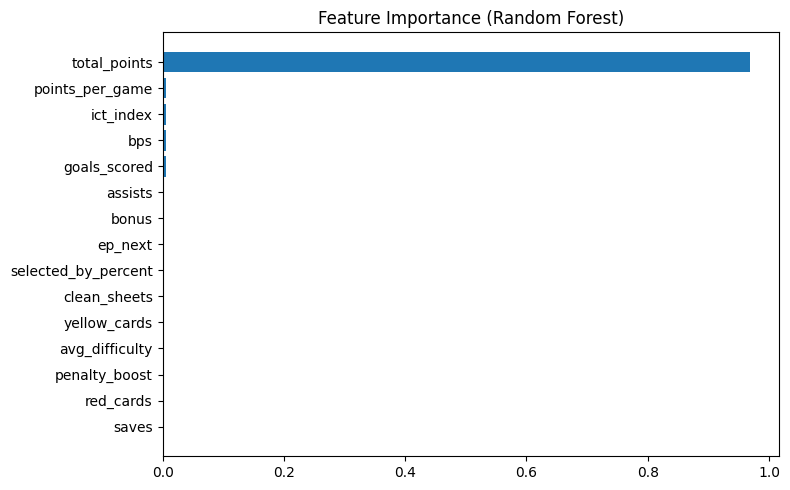

📊 Feature importance saved to: ml_feature_importance.xlsx


In [31]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load player dataset
players_df = pd.read_excel("fpl_players_24_25.xlsx")

# Load fixture difficulty data
fixtures_df = pd.read_excel("fpl_fixtures_named_24_25.xlsx")

# ---- Preprocess Players ----
# Keep only available players
players_df = players_df[players_df['status'] == 'a']

# Compute average difficulty for next 5 GWs
team_difficulty = []
for team in players_df['team_name'].unique():
    team_fixtures = fixtures_df[(fixtures_df['home_team'] == team) | (fixtures_df['away_team'] == team)]
    team_fixtures = team_fixtures.sort_values('gameweek').head(5)
    avg_diff = np.mean([
        row['home_team_difficulty'] if row['home_team'] == team else row['away_team_difficulty']
        for _, row in team_fixtures.iterrows()
    ])
    team_difficulty.append((team, avg_diff))
difficulty_dict = dict(team_difficulty)
players_df['avg_difficulty'] = players_df['team_name'].map(difficulty_dict)

# ---- Feature Selection ----
common_features = [
    'points_per_game', 'ep_next', 'bps', 'bonus', 'ict_index',
    'selected_by_percent', 'avg_difficulty', 'yellow_cards', 'red_cards', 'total_points', 'goals_scored', 'assists', 'clean_sheets', 'saves'
]

# Penalty order encoding
def encode_penalty_boost(val):
    if val == 1:
        return 1.0
    elif val == 2:
        return 0.5
    else:
        return 0.0

players_df['penalty_boost'] = players_df['penalties_order'].apply(encode_penalty_boost)

# Final features per player
features = common_features + ['penalty_boost']

# Drop players with missing values
ml_df = players_df.dropna(subset=features + ['total_points'])

# Define X and y
X = ml_df[features]
y = ml_df['total_points']

# ---- Train-Test Split ----
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---- Model Training ----
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ---- Evaluation ----
y_pred = model.predict(X_test)
rmse = (mean_squared_error(y_test, y_pred)) ** 0.5
print(f"✅ RMSE on test set: {rmse:.3f}")

# ---- Predict for All Players ----
ml_df['predicted_score'] = model.predict(X)

# ---- Save Predictions by Position ----
with pd.ExcelWriter("ml_expected_scores_24_25.xlsx") as writer:
    for pos in ['GKP', 'DEF', 'MID', 'FWD']:
        ml_df[ml_df['position'] == pos]\
            .sort_values(by='predicted_score', ascending=False)\
            .to_excel(writer, sheet_name=pos, index=False)

print("✅ Predictions saved to: ml_expected_scores_24_25.xlsx")

# ---- Feature Importance ----
importances = model.feature_importances_
importance_df = pd.DataFrame({
    'feature': features,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Save feature importance to Excel
importance_df.to_excel("ml_feature_importance.xlsx", index=False)

# Optional: plot
plt.figure(figsize=(8, 5))
plt.barh(importance_df['feature'], importance_df['importance'])
plt.title("Feature Importance (Random Forest)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("📊 Feature importance saved to: ml_feature_importance.xlsx")


In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import os

# === Load the dataset ===
players_file = 'fpl_players_24_25.xlsx'
players_df = pd.read_excel(players_file)

# === Preprocess ===
# Filter out unavailable players
players_df = players_df[players_df['status'] == 'a']

# Fill penalty order with 0
players_df['penalties_order'] = players_df['penalties_order'].fillna(0)

fixtures_df = pd.read_excel("fpl_fixtures_named_24_25.xlsx")

#compute difficulty for next 5 gws
team_difficulty = []
for team in players_df['team_name'].unique():
    team_fixtures = fixtures_df[(fixtures_df['home_team'] == team) | (fixtures_df['away_team'] == team)]
    team_fixtures = team_fixtures.sort_values('gameweek').head(5)
    avg_diff = np.mean([
        row['home_team_difficulty'] if row['home_team'] == team else row['away_team_difficulty']
        for _, row in team_fixtures.iterrows()
    ])
    team_difficulty.append((team, avg_diff))
difficulty_dict = dict(team_difficulty)
players_df['avg_difficulty_5gw'] = players_df['team_name'].map(difficulty_dict)

# # Use only GWs 1–5 average difficulty
# players_df['avg_difficulty_5gw'] = players_df[['GW1_difficulty', 'GW2_difficulty', 'GW3_difficulty', 'GW4_difficulty', 'GW5_difficulty']].mean(axis=1)

# === Define features per position ===
position_feature_map = {
    'GKP': [
        'saves', 'penalties_saved', 'clean_sheets', 'goals_conceded',
        'yellow_cards', 'red_cards', 'bps', 'bonus', 'ict_index',
        'ep_next', 'points_per_game', 'selected_by_percent', 'avg_difficulty_5gw'
    ],
    'DEF': [
        'clean_sheets', 'assists', 'goals_scored',
        'bps', 'bonus', 'ict_index', 'yellow_cards', 'red_cards',
        'ep_next', 'points_per_game', 'selected_by_percent', 'avg_difficulty_5gw'
    ],
    'MID': [
        'goals_scored', 'assists', 'expected_goals', 'expected_assists',
        'ict_index', 'bps', 'bonus', 'penalties_order',
        'ep_next', 'points_per_game', 'selected_by_percent', 'avg_difficulty_5gw',
        'yellow_cards', 'red_cards'
    ],
    'FWD': [
        'goals_scored', 'assists', 'expected_goals', 'expected_assists',
        'ict_index', 'bps', 'bonus', 'penalties_order',
        'ep_next', 'points_per_game', 'selected_by_percent', 'avg_difficulty_5gw',
        'yellow_cards', 'red_cards'
    ]
}

# === Results container ===
all_predictions = {}
feature_importances = {}

# === Train separate models per position ===
for position in ['GKP', 'DEF', 'MID', 'FWD']:
    print(f"\nTraining model for: {position}")
    # print(f"players_df: {players_df}")
    df_pos = players_df[players_df['position'] == position].copy()
    # print(f"df_pos: {df_pos}")
    features = position_feature_map[position]
    df_pos = df_pos[features + ['total_points', 'first_name', 'second_name', 'team_name', 'now_cost', 'position']].copy()
    df_pos = df_pos.dropna()

    X = df_pos[features]
    y = df_pos['total_points']
    # print(f"df_pos: {df_pos}")

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model = XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    rmse = (mean_squared_error(y_test, y_pred)) ** 0.5
    print(f"{position} RMSE: {rmse:.2f}")

    # Predict for full position data
    df_pos['expected_score'] = model.predict(X)

    # Save predictions
    all_predictions[position] = df_pos[['first_name', 'second_name', 'team_name', 'now_cost', 'position', 'expected_score'] + features].sort_values(by='expected_score', ascending=False)

    # Save feature importances
    feature_imp = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
    feature_importances[position] = feature_imp

# === Export to Excel ===
with pd.ExcelWriter('xgboost_expected_scores_by_position.xlsx', engine='openpyxl') as writer:
    for position, df in all_predictions.items():
        df.to_excel(writer, sheet_name=position, index=False)

print("\n✅ Exported predictions to 'xgboost_expected_scores_by_position.xlsx'")

# === Print Feature Importances Summary ===
print("\n📊 Feature Importances (Top 5 per position):")
for position, imp in feature_importances.items():
    print(f"\n--- {position} ---")
    print(imp.head(5).to_string())



Training model for: GKP
GKP RMSE: 10.02

Training model for: DEF
DEF RMSE: 6.84

Training model for: MID
MID RMSE: 6.02

Training model for: FWD
FWD RMSE: 7.08

✅ Exported predictions to 'xgboost_expected_scores_by_position.xlsx'

📊 Feature Importances (Top 5 per position):

--- GKP ---
saves             0.889540
clean_sheets      0.058452
bps               0.051430
goals_conceded    0.000342
ep_next           0.000119

--- DEF ---
clean_sheets           0.683896
bps                    0.281306
ict_index              0.012351
selected_by_percent    0.010553
goals_scored           0.004867

--- MID ---
ict_index          0.782799
bps                0.147507
goals_scored       0.019436
points_per_game    0.014884
expected_goals     0.011091

--- FWD ---
ict_index              0.693198
goals_scored           0.254079
expected_goals         0.048164
bps                    0.001897
selected_by_percent    0.001677


In [42]:
pip install xlsxwriter

Note: you may need to restart the kernel to use updated packages.


Could not find platform independent libraries <prefix>


In [46]:
import pandas as pd
from pulp import LpProblem, LpVariable, lpSum, LpMaximize, LpBinary, LpStatus, value

# ---------- LOAD DATA ----------
excel_path = "xgboost_expected_scores_by_position.xlsx"  # Change to your Excel file
positions = ['GKP','DEF','MID','FWD']
all_players = []

for pos in positions:
    df = pd.read_excel(excel_path, sheet_name=pos)
    df['position'] = pos.upper()
    all_players.append(df)

df_all = pd.concat(all_players, ignore_index=True)

# Required columns
df_all = df_all[['first_name', 'second_name', 'team_name', 'expected_score', 'position', 'now_cost']].dropna()
df_all['name'] = df_all['first_name'] + ' ' + df_all['second_name']
df_all['cost'] = df_all['now_cost'] / 10

# ---------- ILP MODEL ----------
model = LpProblem("FPL_15_Man_Squad_With_Captain", LpMaximize)

# Decision variables
player_vars = {i: LpVariable(f"select_{row['name']}_{i}", cat=LpBinary) for i, row in df_all.iterrows()}
captain_vars = {i: LpVariable(f"captain_{row['name']}_{i}", cat=LpBinary) for i, row in df_all.iterrows()}

# ---------- OBJECTIVE FUNCTION ----------
model += lpSum([
    (2 * row['expected_score'] * captain_vars[i]) + 
    (row['expected_score'] * (player_vars[i] - captain_vars[i]))
    for i, row in df_all.iterrows()
])

# ---------- CONSTRAINTS ----------

# Squad size
model += lpSum(player_vars.values()) == 15

# Position limits
model += lpSum([player_vars[i] for i in df_all[df_all['position'] == 'GKP'].index]) == 2
model += lpSum([player_vars[i] for i in df_all[df_all['position'] == 'DEF'].index]) == 5
model += lpSum([player_vars[i] for i in df_all[df_all['position'] == 'MID'].index]) == 5
model += lpSum([player_vars[i] for i in df_all[df_all['position'] == 'FWD'].index]) == 3

# Max 3 per team
for team in df_all['team_name'].unique():
    model += lpSum([player_vars[i] for i in df_all[df_all['team_name'] == team].index]) <= 3

# Budget
model += lpSum([row['cost'] * player_vars[i] for i, row in df_all.iterrows()]) <= 100.0

# Exactly 1 captain
model += lpSum(captain_vars.values()) == 1

# A captain must be one of the selected players
for i in df_all.index:
    model += captain_vars[i] <= player_vars[i]

# ---------- SOLVE ----------
model.solve()

# ---------- RESULTS ----------
print(f"Solver Status: {LpStatus[model.status]}\n")

# Get selected squad
selected = []
for i, row in df_all.iterrows():
    if player_vars[i].value() == 1:
        selected.append({
            'Name': row['name'],
            'Team': row['team_name'],
            'Position': row['position'],
            'Cost': row['cost'],
            'Expected_Score': row['expected_score'],
            'Captain': 'Yes' if captain_vars[i].value() == 1 else ''
        })

squad_df = pd.DataFrame(selected).sort_values(by='Position')
total_score = squad_df['Expected_Score'].sum() + squad_df[squad_df['Captain'] == 'Yes']['Expected_Score'].sum()
total_cost = squad_df['Cost'].sum()

# Display squad
print(squad_df.to_string(index=False))
print(f"\nTotal Cost: £{total_cost:.1f}M")
print(f"Total Expected Score (w/ Captain Bonus): {total_score:.2f}")

# ---------- SAVE TO EXCEL ----------
output_path = "XGBOOST_best_15_squad_with_captain.xlsx"
with pd.ExcelWriter(output_path, engine='xlsxwriter') as writer:
    squad_df.to_excel(writer, index=False, sheet_name="Squad")
print(f"\n✅ Squad saved to: {output_path}")


Solver Status: Optimal

              Name           Team Position  Cost  Expected_Score Captain
 Nikola Milenković  Nott'm Forest      DEF   5.5      144.833588        
Daniel Muñoz Mejía Crystal Palace      DEF   5.5      141.854614        
        Marc Guéhi Crystal Palace      DEF   4.5      126.973991        
 Vitalii Mykolenko        Everton      DEF   5.0      121.747902        
 Aaron Wan-Bissaka       West Ham      DEF   4.5      117.915375        
        Chris Wood  Nott'm Forest      FWD   7.5      199.390594        
      Jarrod Bowen       West Ham      FWD   8.0      192.839172        
       Yoane Wissa      Brentford      FWD   7.5      184.971466        
         Matz Sels  Nott'm Forest      GKP   5.0      149.436935        
    Dean Henderson Crystal Palace      GKP   5.0      134.901016        
     Mohamed Salah      Liverpool      MID  14.5      342.011841     Yes
      Bryan Mbeumo        Man Utd      MID   8.0      235.522461        
      Jacob Murphy      New

In [44]:
import pandas as pd
from pulp import LpProblem, LpVariable, lpSum, LpMaximize, LpBinary, LpStatus, value

# ---------- LOAD DATA ----------
excel_path = "fpl_expected_scores_by_position.xlsx"
positions_map = {
    'Goalkeepers': 'GKP',
    'Defenders': 'DEF',
    'Midfielders': 'MID',
    'Forwards': 'FWD'
}

all_players = []

for sheet, pos in positions_map.items():
    df = pd.read_excel(excel_path, sheet_name=sheet)
    df['position'] = pos
    all_players.append(df)

df_all = pd.concat(all_players, ignore_index=True)

# Required columns
df_all = df_all[['first_name', 'second_name', 'team_name', 'expected_score', 'position', 'now_cost']].dropna()
df_all['name'] = df_all['first_name'] + ' ' + df_all['second_name']
df_all['cost'] = df_all['now_cost'] / 10

# ---------- ILP MODEL ----------
model = LpProblem("FPL_15_Man_Squad_With_Captain", LpMaximize)

# Decision variables
player_vars = {i: LpVariable(f"select_{row['name']}_{i}", cat=LpBinary) for i, row in df_all.iterrows()}
captain_vars = {i: LpVariable(f"captain_{row['name']}_{i}", cat=LpBinary) for i, row in df_all.iterrows()}

# ---------- OBJECTIVE FUNCTION ----------
model += lpSum([
    (2 * row['expected_score'] * captain_vars[i]) + 
    (row['expected_score'] * (player_vars[i] - captain_vars[i]))
    for i, row in df_all.iterrows()
])

# ---------- CONSTRAINTS ----------

# Squad size
model += lpSum(player_vars.values()) == 15

# Position limits
model += lpSum([player_vars[i] for i in df_all[df_all['position'] == 'GKP'].index]) == 2
model += lpSum([player_vars[i] for i in df_all[df_all['position'] == 'DEF'].index]) == 5
model += lpSum([player_vars[i] for i in df_all[df_all['position'] == 'MID'].index]) == 5
model += lpSum([player_vars[i] for i in df_all[df_all['position'] == 'FWD'].index]) == 3

# Max 3 per team
for team in df_all['team_name'].unique():
    model += lpSum([player_vars[i] for i in df_all[df_all['team_name'] == team].index]) <= 3

# Budget
model += lpSum([row['cost'] * player_vars[i] for i, row in df_all.iterrows()]) <= 100.0

# Exactly 1 captain
model += lpSum(captain_vars.values()) == 1

# A captain must be one of the selected players
for i in df_all.index:
    model += captain_vars[i] <= player_vars[i]

# ---------- SOLVE ----------
model.solve()

# ---------- RESULTS ----------
status = LpStatus[model.status]
print(f"Solver Status: {status}\n")

if status != "Optimal":
    print("⚠️ Optimization was not successful. Check constraints or budget.")
else:
    # Get selected squad
    selected = []
    for i, row in df_all.iterrows():
        if player_vars[i].value() == 1:
            selected.append({
                'Name': row['name'],
                'Team': row['team_name'],
                'Position': row['position'],
                'Cost': row['cost'],
                'Expected_Score': row['expected_score'],
                'Captain': 'Yes' if captain_vars[i].value() == 1 else ''
            })

    squad_df = pd.DataFrame(selected).sort_values(by='Position')
    total_score = squad_df['Expected_Score'].sum() + squad_df[squad_df['Captain'] == 'Yes']['Expected_Score'].sum()
    total_cost = squad_df['Cost'].sum()

    # Display squad
    print(squad_df.to_string(index=False))
    print(f"\nTotal Cost: £{total_cost:.1f}M")
    print(f"Total Expected Score (w/ Captain Bonus): {total_score:.2f}")

    # ---------- SAVE TO EXCEL ----------
    output_path = "best_15_squad_with_captain.xlsx"
    with pd.ExcelWriter(output_path, engine='xlsxwriter') as writer:
        squad_df.to_excel(writer, index=False, sheet_name="Squad")

        # Add metadata sheet
        meta = pd.DataFrame({
            'Metric': ['Total Cost', 'Total Expected Score', 'Solver Status'],
            'Value': [f"£{total_cost:.1f}M", f"{total_score:.2f}", status]
        })
        meta.to_excel(writer, index=False, sheet_name="Summary")
    
    print(f"\n✅ Squad saved to: {output_path}")


Solver Status: Optimal

             Name           Team Position  Cost  Expected_Score Captain
         Ola Aina  Nott'm Forest      DEF   5.0      145.416452        
   Nathan Collins      Brentford      DEF   5.0      142.498493        
  Tyrick Mitchell Crystal Palace      DEF   5.0      141.659092        
       Marc Guéhi Crystal Palace      DEF   4.5      132.830846        
Aaron Wan-Bissaka       West Ham      DEF   4.5      130.849523        
       Chris Wood  Nott'm Forest      FWD   7.5      245.509843        
     Jarrod Bowen       West Ham      FWD   8.0      230.670442        
      Yoane Wissa      Brentford      FWD   7.5      227.944871        
  Jordan Pickford        Everton      GKP   5.5      326.642967        
        Matz Sels  Nott'm Forest      GKP   5.0      315.171066        
    Mohamed Salah      Liverpool      MID  14.5      419.256818     Yes
     Bryan Mbeumo        Man Utd      MID   8.0      283.732487        
  Antoine Semenyo    Bournemouth      MI

In [49]:
import pandas as pd
from pulp import LpProblem, LpVariable, lpSum, LpMaximize, LpBinary, LpStatus, value

# ---------- LOAD DATA ----------
excel_path = "ml_expected_scores_24_25.xlsx"  # Change to your Excel file
positions = ['GKP','DEF','MID','FWD']
all_players = []

for pos in positions:
    df = pd.read_excel(excel_path, sheet_name=pos)
    df['position'] = pos.upper()
    all_players.append(df)

df_all = pd.concat(all_players, ignore_index=True)

# Required columns
df_all = df_all[['first_name', 'second_name', 'team_name', 'predicted_score', 'position', 'now_cost']].dropna()
df_all['name'] = df_all['first_name'] + ' ' + df_all['second_name']
df_all['cost'] = df_all['now_cost'] / 10

# ---------- ILP MODEL ----------
model = LpProblem("FPL_15_Man_Squad_With_Captain", LpMaximize)

# Decision variables
player_vars = {i: LpVariable(f"select_{row['name']}_{i}", cat=LpBinary) for i, row in df_all.iterrows()}
captain_vars = {i: LpVariable(f"captain_{row['name']}_{i}", cat=LpBinary) for i, row in df_all.iterrows()}

# ---------- OBJECTIVE FUNCTION ----------
model += lpSum([
    (2 * row['predicted_score'] * captain_vars[i]) + 
    (row['predicted_score'] * (player_vars[i] - captain_vars[i]))
    for i, row in df_all.iterrows()
])

# ---------- CONSTRAINTS ----------

# Squad size
model += lpSum(player_vars.values()) == 15

# Position limits
model += lpSum([player_vars[i] for i in df_all[df_all['position'] == 'GKP'].index]) == 2
model += lpSum([player_vars[i] for i in df_all[df_all['position'] == 'DEF'].index]) == 5
model += lpSum([player_vars[i] for i in df_all[df_all['position'] == 'MID'].index]) == 5
model += lpSum([player_vars[i] for i in df_all[df_all['position'] == 'FWD'].index]) == 3

# Max 3 per team
for team in df_all['team_name'].unique():
    model += lpSum([player_vars[i] for i in df_all[df_all['team_name'] == team].index]) <= 3

# Budget
model += lpSum([row['cost'] * player_vars[i] for i, row in df_all.iterrows()]) <= 100.0

# Exactly 1 captain
model += lpSum(captain_vars.values()) == 1

# A captain must be one of the selected players
for i in df_all.index:
    model += captain_vars[i] <= player_vars[i]

# ---------- SOLVE ----------
model.solve()

# ---------- RESULTS ----------
print(f"Solver Status: {LpStatus[model.status]}\n")

# Get selected squad
selected = []
for i, row in df_all.iterrows():
    if player_vars[i].value() == 1:
        selected.append({
            'Name': row['name'],
            'Team': row['team_name'],
            'Position': row['position'],
            'Cost': row['cost'],
            'Expected_Score': row['predicted_score'],
            'Captain': 'Yes' if captain_vars[i].value() == 1 else ''
        })

squad_df = pd.DataFrame(selected).sort_values(by='Position')
total_score = squad_df['Expected_Score'].sum() + squad_df[squad_df['Captain'] == 'Yes']['Expected_Score'].sum()
total_cost = squad_df['Cost'].sum()

# Display squad
print(squad_df.to_string(index=False))
print(f"\nTotal Cost: £{total_cost:.1f}M")
print(f"Total Expected Score (w/ Captain Bonus): {total_score:.2f}")

# ---------- SAVE TO EXCEL ----------
output_path = "Random_Forest_best_15_squad_with_captain.xlsx"
with pd.ExcelWriter(output_path, engine='xlsxwriter') as writer:
    squad_df.to_excel(writer, index=False, sheet_name="Squad")
print(f"\n✅ Squad saved to: {output_path}")


Solver Status: Optimal

                  Name           Team Position  Cost  Expected_Score Captain
        Joško Gvardiol       Man City      DEF   6.0          153.12        
     Nikola Milenković  Nott'm Forest      DEF   5.5          145.11        
    Daniel Muñoz Mejía Crystal Palace      DEF   5.5          142.78        
     Aaron Wan-Bissaka       West Ham      DEF   4.5          118.01        
            Marc Guéhi Crystal Palace      DEF   4.5          115.73        
            Chris Wood  Nott'm Forest      FWD   7.5          201.06        
           Yoane Wissa      Brentford      FWD   7.5          185.73        
Raúl Jiménez Rodríguez         Fulham      FWD   6.5          148.15        
       Jordan Pickford        Everton      GKP   5.5          157.34        
             Matz Sels  Nott'm Forest      GKP   5.0          149.48        
         Mohamed Salah      Liverpool      MID  14.5          294.67     Yes
          Bryan Mbeumo        Man Utd      MID   8.0